### Modal SNA MAP473D, Ecole Polytechnique, 2019-20

# TP1 - Simulation de variables aléatoires, loi des grands nombres, théorème central limite

## Utilisation d'un notebook Jupyter


IPython définit un certain nombre de [commandes magiques](https://ipython.readthedocs.io/en/stable/interactive/magics.html) utiles. En particulier `%matplotlib inline` pour afficher les graphiques dans le notebook. 

In [1]:
%matplotlib inline

il peut parfois aussi être utile de relancer l'interpreteur python sans quitter le notebook: 

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Quelques raccourcis à connaitre pour naviguer dans un notebook: 
    
* `[ENTREE]` entre dans une cellule (passe en mode édition)
* `[ESC]` sort d'une cellule (passe en mode commande)
* `[MAJ]+ENTREE` execute la cellule et passe à la suivante
* `[ALT]+ENTREE` execute la cellule et insère une nouvelle cellule dessous
* `[CTRL]+ENTREE` execute les cellules selectionnées


* `A` insère une cellule avant
* `B` insère une cellule après
* `D+D` supprime une cellule
* `Z` annule la suppression
* `[MAJ]+M` fusionne les cellules selectionnées
* `C` `V` `X` copy paste des cellules

Pour obtenir de l'aide / de la documentation: 

* Autocompletion à l'aide de la touche `TAB` : permet de voir les méthodes disponibles. 
* Affichage de la signature d'une fonction à l'aide de `[MAJ] + [TAB]` 
* Affichage de la documentation complète (docstring) d'une fonction à l'aide de `[MAJ] + [TAB] + [TAB] + [TAB] + [TAB]` 
* Alternativement, `?object` ou `object?` affiche aussi la documentation associée à `object`.

On importe les libraries nécessaires: `numpy` pour les opérations vectorielles. `matplotlib` pour tracer les graphiques. `scipy.stats` pour le module statistiques de scipy (qui contient en particulier les distributions des lois de probabilités usuelles).  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Exercice 1. Simulation et affichage de lois discrètes

#### 1.1 Un exemple simple

On considère la loi $P$ sur l'ensemble $\{1,2,3\}$ définie par $P(\{1\})=0.3$, $P(\{2\})=0.6$, $P(\{3\})=0.1$.
Simuler un grand nombre de v.a. i.i.d. de loi $P$, en faire l'histogramme en bâtons.

*Indications*: on pourra utiliser les fonctions

+ `numpy.random.choice(a, size = N, replace = True, p = [p_1,..., p_n])`, qui génère `N` tirages indépendants (argument `replace = True` activé par défaut) suivant la loi `[p_1,..., p_n]` (argument `p`, par défaut la loi uniforme)) sur l'espace d'états `a = [a_1, ..., a_n]`.
Voir la [documentation officielle](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html) de la fonction pour plus de détails.


+ `matplotlib.pyplot.bar(x,y)` ou `matplotlib.pyplot.stem(x,y)`, qui génèrent un diagramme en bâtons: un graphique contenant des segments verticaux de hauteur`y` placés aux abscisses `x`, sans marqueur (pour
`pyplot.bar`) ou avec marqueur (pour `pyplot.stem`) au niveau `y`.

C:\Users\Peng-Wei CHEN\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


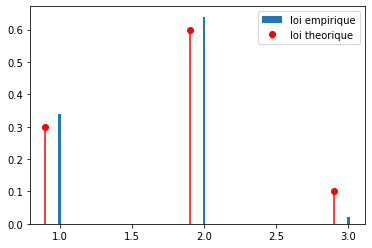

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 50

##########################
# TO DO: compléter
##########################
valeurs = np.array([1, 2, 3])
probas = [0.3, 0.6, 0.1]

X = np.random.choice(valeurs, size = N, p = probas)

# La fonction bincount compte le nombre de fois que l'on a 0 dans le vecteur, le nombre de
# fois que l'on a 1, le nombre de fois que l'on a 2, etc...
# On enleve donc la premiere valeur qui dit que l'on observe 0 fois la valeur 0
counts = np.bincount(X)[1:]
counts = counts / N

#################################################################
# TO DO: construire l'histogramme avec la fonction bar de pyplot
#################################################################
plt.bar(valeurs, counts, width=0.02, label="loi empirique")

# On affiche la loi theorique
plt.stem(valeurs - 0.1, probas, linefmt="r", markerfmt="ro", basefmt="None", label="loi theorique")

# On demande que la legende soit affichee
plt.legend(loc='best')

# On affiche la figure
plt.show()

#### 1.2 Des lois discrètes classiques

$\blacktriangleright$ **Loi Binomiale**. 
On considère $B(n,p)$, la loi binomiale de paramètres $n$ et $p$. Ecrire un code dans lequel on simule un grand nombre de v.a. de loi $B(n,p)$ (en utilisant la fonction `binomial` de `numpy.random`), faire l'histogramme en bâtons de l'échantillon obtenu et comparer avec la représentation, sur le même graphique, de la loi $B(n,p)$ (que l'on peut obtenir à l'aide de la  fonction `binom.pmf` - `pmf` pour probability mass function - de `scipy.stats`).

In [6]:
%%time
for i in range(100000):
    N = 1000

Wall time: 7.98 ms


C:\Users\Peng-Wei CHEN\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


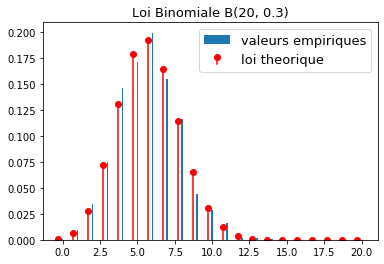

In [21]:
import scipy.stats as stats

n = 20
p = 0.3

# Nombre de simulations
N = int(1e3)

###################################
# TO DO: compléter avec N tirages
# de la loi binomial B(n,p)
###################################
B = np.random.binomial(n, p, size=N)

# Fonction bincount:
# on force la longueur du vecteur counts à etre n+1 - meme si toutes
# les valeurs entre 0 et n ne sont pas observées dans l'echantillon B
counts = np.bincount(B, minlength = n + 1)
counts = counts / N

#################################################################
# TO DO: afficher l'histogramme et la la loi théorique,
# que l'on peut evaluer avec la librairie scipy.stats
#################################################################

plt.bar([i for i in range(n + 1)], counts, width=0.1, label="valeurs empiriques" )

x = np.arange(n + 1)
f_X = stats.binom(n, p).pmf(x)
plt.stem(x - 0.3, f_X,linefmt="r", markerfmt="ro", basefmt="None", label="loi theorique" )

plt.title("Loi Binomiale B({}, {})".format(n, p), fontsize=13)
plt.legend(loc='best', fontsize=13)
plt.show()

$\blacktriangleright$ **Loi de Poisson**. Faire de même avec une loi de Poisson de paramètre $\mu$. On pourra utiliser la fonction `poisson` de `numpy.random` pour générer les tirages, et la fonction `poisson.pmf` de `scipy.stats` pour le calcul de la loi exacte.

C:\Users\Peng-Wei CHEN\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


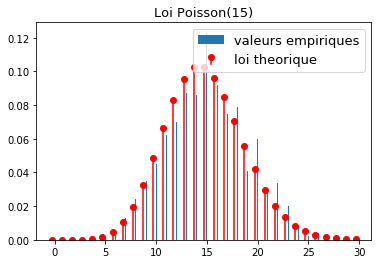

In [24]:
mu = 15
N = int(1e3)

########################################
# TO DO: compléter avec N tirages
# de la loi de Poisson de paramètre mu
# et leur histogramme 
########################################
X = np.random.poisson(lam=mu, size=N)

# Fonction bincount:
# on force la longueur du vecteur counts à etre n+1 - meme si toutes
# les valeurs entre 0 et n ne sont pas observées dans l'echantillon B
counts = np.bincount(X)
counts = counts / N

#################################################################
# TO DO: afficher l'histogramme et la la loi théorique,
# que l'on peut evaluer avec la librairie scipy.stats
#################################################################

plt.bar([i for i in range(len(counts))], counts, width=0.1, label="valeurs empiriques" )

x = np.arange(len(counts) + 1)
f_X = stats.poisson(mu).pmf(x)
plt.stem(x - 0.3, f_X,linefmt="r", markerfmt="ro", basefmt="None", label="loi theorique" )

plt.title("Loi Poisson({})".format(mu), fontsize=13)
plt.legend(loc='best', fontsize=13)
plt.show()


On peut se passer de la méthode `stats.poisson.pmf` et la coder directement puisque la formule est simple et explicite: 
$$
\hbox{poisson.pmf}(x) = \frac{\mu^x e^{-\mu}}{\Gamma(x+1)}.
$$
Mais il faut être prudent dans la manière de faire... Executer la cellule ci dessous. Recommencer en changeant la valeur mu=10. Que se passe t'il ? Comment corriger l'implementation de la fonction `poisson_pmf` ? 

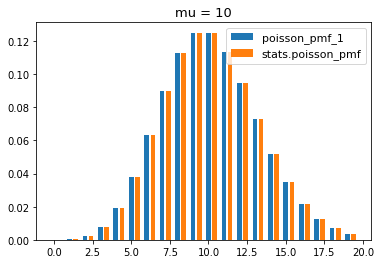

In [32]:
# pour utiliser les fonctions gamma et gammaln.
import scipy.special as sc   

# parametre de la Poisson
mu = 10

# implementation naive
def poisson_pmf(x, mu):
    return np.exp(-mu + x * np.log(mu) - sc.gammaln(x+1))

x = np.arange(20);
    
# on compare poisson_pmf et avec l'implementation de scipy.stats
plt.bar(x, poisson_pmf(x, mu), width=0.3, label="poisson_pmf_1")
plt.bar(x + 0.4, stats.poisson.pmf(x, mu), width=0.3, label="stats.poisson_pmf")
plt.title("mu = {}".format(mu), fontsize=13)
plt.legend(loc="best", fontsize=11)
plt.show()

$\blacktriangleright$ Comparaison entre deux lois. Un calcul simple montre que lorsque $n$ tend vers l'infini, la loi

$$B(n, \lambda/n)$$

tend vers la loi de Poisson de paramètre $\lambda$.
En pratique, on assimile $B(n, p)$ à la loi de Poisson de paramètre $n \, p$ dès que $n \, p^2 < 0.1$. Illustrer cette proximité de lois en affichant, sur le même graphique, leurs histogrammes en bâtons (sans faire de simulation).

C:\Users\Peng-Wei CHEN\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


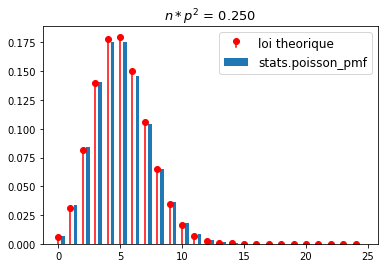

In [34]:
n = 100
p = 0.05
lbda = p * n

x = np.arange(0, 5 * lbda)

################################################
# TO DO: compléter avec le calcul des deux lois
# et leur affichage
################################################

f_X = stats.binom(n, p).pmf(x)
plt.stem(x, f_X,linefmt="r", markerfmt="ro", basefmt="None", label="loi theorique" )
plt.bar(x + 0.4, stats.poisson.pmf(x, lbda), width=0.3, label="stats.poisson_pmf")

plt.title(r"$n * p^2$ = %1.3f" %(n * p**2), fontsize=13)
plt.legend(loc="best", fontsize=12)
plt.show()

### Exercice 2. Simulation de variables aléatoires continues (I)

Simuler un grand nombre de variables aléatoires gaussiennes standard, représenter leur histogramme et comparer à la densité gaussienne. Faire de même avec des variables aléatoires de loi gamma. On pourra utiliser les fonctions

  + `randn` et `gamma` de `numpy.random` pour obtenir des tirages de la loi gaussienne standard et de la loi gamma
  
  
  + les fonctions `hist` et `plot` de `matplotlib.pyplot` pour l'histogramme et la représentation des densités
  
  
  + les fonctions `norm.pdf` et `gamma.pdf` (`pdf` pour probability density function) de la librairie `scipy.stats` pour le calcul des densités.
  
Pour le nombre de colonnes de l'histogramme, on pourra utiliser $2N^{1/3}$ , où $N$ est la taille de l'échantillon (voir le TP2 pour plus de détails).

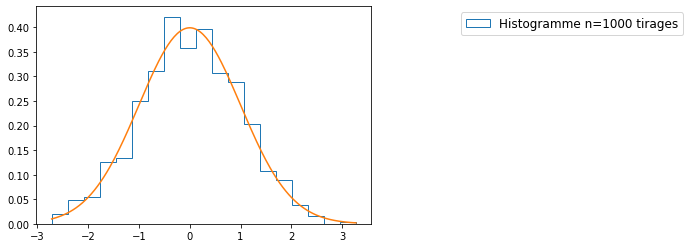

In [44]:
n = int(1e3)
m = 0.  # Esperance
s = 1.  # Ecart-type

###################################################
# TO DO: compléter avec n tirages de la loi N(m,s)
#
# La fonction randn de numpy.random genere des v.a. 
# gaussiennes centrees reduites
###################################################
X = np.random.randn(n)


n_colonnes = int(2 * n**(1 / 3))

plt.hist( X , bins=n_colonnes, density=True, histtype="step", label="Histogramme n=%1.0f tirages" %n)

x = np.linspace(np.min(X), np.max(X), 200)

###################################################
# TO DO: compléter avec l'affichage de la densité
###################################################

plt.plot(x, stats.norm.pdf(x))

plt.legend(fontsize=12, loc=9, bbox_to_anchor=(1.6, 1.0), ncol=1)
plt.show()

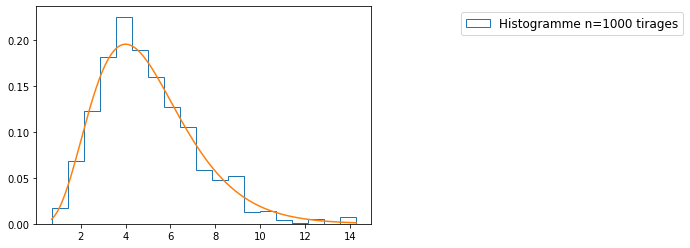

In [52]:
#####################################################
# TO DO: faire de meme pour des variables aléatoires
# de loi gamma
#####################################################
n = int(1e3)
k = 5

X = np.random.gamma(shape=k, size=n)

n_colonnes = int(2 * n**(1 / 3))

plt.hist( X , bins=n_colonnes, density=True, histtype="step", label="Histogramme n=%1.0f tirages" %n)

x = np.linspace(np.min(X), np.max(X), 200)

###################################################
# TO DO: compléter avec l'affichage de la densité
###################################################

plt.plot(x, stats.gamma.pdf(x, a=k))

plt.legend(fontsize=12, loc=9, bbox_to_anchor=(1.6, 1.0), ncol=1)
plt.show()

 #### $\blacktriangleright$ Absence de mémoire.
 
La code ci-dessous illustre la propriété d'absence de mémoire de la loi exponentielle:
si $X$ suit une telle loi, alors pour tout $t > 0$, la loi de $X - t$ sachant $X > t$ est la loi de $X$.


Executer la cellule, ensuite faire la même expérience en remplaçant la loi exponentielle par des (autres) lois gamma.
A-t-on encore absence de mémoire ?

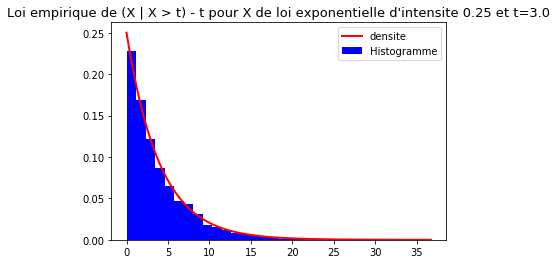

In [53]:
t = 3.

# Paramètre de la loi exponentielle
lbda = 0.25
N = int(1.e4)

# Attention: la fonction exponential de numpy.random
# prend comme argument `scale` la moyenne de la loi
# exponentielle, pas son paramètre lambda
X = np.random.exponential(scale=1/lbda, size=N)

# Simulation par rejet de la loi conditionnelle
X_c = X[X > t] - t

n_colonnes = 2 * int(len(X_c)** (1./3))
plt.hist(X_c, density=True, bins=n_colonnes, color="b", label="Histogramme")

# On affiche la densité de la loi exponentielle pour comparaison
x = np.linspace(0., np.max(X_c), 200)
f_x = lbda * np.exp(-lbda*x)

plt.plot(x, f_x, color="r", label="densite", linewidth=2.0)

plt.title("Loi empirique de (X | X > t) - t pour X de loi exponentielle "
          "d'intensite %1.2f et t=%1.1f" %(lbda,t), fontsize=13)
plt.legend()
plt.show()

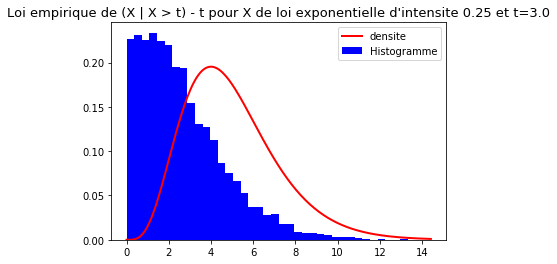

In [56]:
#####################################################
# TO DO: faire de meme pour des variables aléatoires
# de loi gamma
#####################################################
t = 3.

# Paramètre de la loi gamma
k = 5
N = int(1.e4)

# Attention: la fonction gamma de numpy.random
# prend comme argument `scale` la moyenne de la loi
# exponentielle, pas son paramètre lambda
X = np.random.gamma(shape=5, size=N)

# Simulation par rejet de la loi conditionnelle
X_c = X[X > t] - t

n_colonnes = 2 * int(len(X_c)** (1./3))
plt.hist(X_c, density=True, bins=n_colonnes, color="b", label="Histogramme")

# On affiche la densité de la loi exponentielle pour comparaison
x = np.linspace(0., np.max(X_c), 200)
f_x = stats.gamma.pdf(x, a=k)

plt.plot(x, f_x, color="r", label="densite", linewidth=2.0)

plt.title("Loi empirique de (X | X > t) - t pour X de loi exponentielle "
          "d'intensite %1.2f et t=%1.1f" %(lbda,t), fontsize=13)
plt.legend()
plt.show()


### Exercice 3. Programmation matricielle

#### 3.1 Motivation

En python, la programmation matricielle proposée par la librairie `numpy` est plus rapide que celle reposant sur des boucles.

Le code suivant compare le calcul d'une valeur approchée du nombre

$$
\gamma \approx \sum_{i=1}^n \frac 1 i - \ln(n) \qquad \mbox{pour } n \gg 1
$$

en programmation matricielle et via une boucle.

Faire tourner la cellule, et observer le rapport de temps de calcul entre les deux méthodes.

In [57]:
from timeit import timeit

setup = """
import numpy as np
n = int(1e5)
"""

# Methode 1. Boucle for
print("Methode 1. Boucle for")
code_boucle_for = """
np.sum([1. / i for i in range(1, n)]) - np.log(n)
"""
n_tries = 10
time_boucle_for = timeit(code_boucle_for, setup=setup, number=n_tries) / n_tries
print("Temps moyen écoulé: %1.4f secondes par essai  \n" %time_boucle_for)

# Methode 2. Numpy
print("Methode 2. Numpy")
code_numpy = """
np.sum(1. / np.arange(1, n)) - np.log(n)
"""
n_tries = 100
time_numpy = timeit(code_numpy, setup=setup, number=n_tries) / n_tries
print("Temps moyen écoulé: %1.4f secondes par essai  \n" %time_numpy)

print("Facteur de gain: %1.2f " %(time_boucle_for / time_numpy))

Methode 1. Boucle for
Temps moyen écoulé: 0.0113 secondes par essai  

Methode 2. Numpy
Temps moyen écoulé: 0.0002 secondes par essai  

Facteur de gain: 46.15 


$\blacktriangleright$ Dans la cellule ci-dessous: une deuxième manière d'appeler la function `timeit`, en utilisant les commandes spéciales `magics` disponibles dans les notebooks Jupyter.

Ces instructions permettent d'appeler des commandes du shell à travers le notebook (comme on le fait ci-dessous). Pour plus de détails, voir la documentation [`magics`](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

In [58]:
n = int(1e5)

t1 = %timeit -n 10 -o np.sum([1. / i for i in range(1, n)]) - np.log(n)
t2 = %timeit -n 100 -o np.sum(1. / np.arange(1, n)) - np.log(n)

facteur_gain = t1.average / t2.average

print("\n Facteur de gain: %1.2f" %facteur_gain)

13.1 ms ± 320 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
234 µs ± 2.56 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

 Facteur de gain: 55.83


$\blacktriangleright$ Encore plus simple: on peut utiliser la commande magique `%%timeit` pour timer le temps d'exécution de toute une cellule (sauf les instructions sur la même ligne que `%%timeit`). 

In [59]:
%%timeit n = int(1e5)
np.sum([1. / i for i in range(1, n)]) - np.log(n)

10.4 ms ± 607 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [60]:
%%timeit
np.sum(1. / np.arange(1, n)) - np.log(n)

236 µs ± 5.05 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### 3.2 Exercices

Les deux questions suivantes sont des exercices de programmation matricielle avec numpy. Notamment, elle permettent d'explorer l'usage des opérations `numpy` lelong des lignes ou des colonnes d'une matrice. Elles sont donc à traiter sans boucles.

On acceptera, exceptionnellement, d'estimer les probabilités demandées sans intervalle de confiance.
On essayera de ne pas passer trop de temps sur ces questions (aborder au moins l'une des deux; ensuite, mieux vaudra passer aux exercices suivants - essentiels pour la suite du Modal - que de s'arrêter trop longtemps sur cet exercice).

$\blacktriangleright$ Soit, pour $N=100$, $X_{(1)}< \cdots< X_{(N)}$ le réordonnement
  croissant d'une famille $X_{1}, \ldots, X_{N}$ de v.a. i.i.d. de loi
  gaussienne standard. Estimer à partir de $M$ tirages i.i.d. de $X_{(1)}< \cdots< X_{(N)}$ la
  probabilité que
  $$
  \cos(X_{(\lfloor 0.8 N\rfloor)}) < 0.6
  $$
  
  On pourra simuler $M \times N$ v.a. gaussiennes, utiliser la fonction `numpy.sort(., axis=1)`
  puis utiliser le fait que si `V` est une matrice, pour tout `j`, `V[:, j]` désigne la `j`-ème
  colonne de `V` (la première étant la colonne numéro 0).
  
  + La fonction partie entière inférieure de `numpy` est `numpy.floor`.
 
  
  + La syntaxe `numpy.random.randn(M,N)` permet de générer un array de $M \times N$ v.a.
  gaussiennes standards indépendantes avec un seul appel à la fonction `randn`.

In [125]:
##############################
# TODO
##############################
M = 10000
N = 100

# Echantillon
X = np.random.randn(M, N)
X = np.sort(X, axis=1)
(np.cos(X[:, int(np.floor(0.8 * N))]) < 0.6).sum() / M

0.3128

$\blacktriangleright$ Soient $(X_{i})_{i\ge 1}$ des v.a. i.i.d. de
  loi uniforme sur $[0,1]$. Estimer $n_0$, la plus petite valeur de
  l'entier $n$ telle que
  
  $$
    \mathbb{P}(X_1 + \cdots + X_n < 5) \le 0.2
  $$
  
  L'inégalité de Markov nous permet d'affirmer que $n_0 \le 20$.
  
  On pourra donc simuler $M \times 20$ v.a., utiliser les fonctions
  `numpy.cumsum(., axis=1)` et `numpy.mean(., axis=0)`, ainsi que la
  fonction `numpy.argwhere`.

In [169]:
##############################
# TODO
##############################
M = 10000
X = np.random.uniform(size=(M, 20))
X = np.cumsum(X, axis=1)
X = np.mean(X < 5, axis=0)
np.min(np.argwhere(X <= 0.2))

11

### Exercice 4. Simulation de variables aléatoires continues (II) : inversion de la fonction de répartition

La loi de Cauchy de paramètre $a$ est la loi de densité

$$
f_a(x) = \frac 1 \pi \frac a{x^2+a^2}
$$

sur $\mathbb R$. 

$\blacktriangleright$ Donner la fonction de répartition de la loi de Cauchy.

$\blacktriangleright$ Simuler un grand nombre de variables aléatoires de loi de Cauchy de paramètre $a$, représenter l'histogramme associé et le comparer à la densité.

$Rappel$: on rappelle que si $U$ est une v.a. uniforme sur $(0,1)$ et $F$ la fonction de répartition d'une loi $\mu$, alors la variable aléatoire $F^{-1}(U)$ est distribuée selon $\mu$.

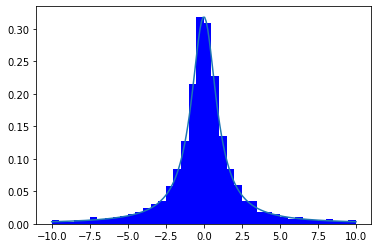

In [199]:
##############################
# TODO
##############################
N = 10000
a = 1
n_columns = int(2 * N ** (1 / 3))
def repartition_cauchy(a, x):
    return np.arctan(x / a) / np.pi + 0.5

def inverse_repartition_cauchy(a, x):
    return a * np.tan(np.pi * x)

def proba(a, x):
    return a / (x ** 2 + a ** 2) / np.pi

X = np.random.uniform(size=N)
X = inverse_repartition_cauchy(a, X)
plt.hist(X, density=True, bins=n_colonnes, range=(-10, 10), color="b", label="Histogramme")
x = np.linspace(-10, 10, num=200)
plt.plot(x, proba(a, x))

### Exercice 5. Loi des grands nombres

On rappelle que si $(X_n)$ est une suite de variables aléatoires indepéndantes identiquement distribuées intégrables et ayant une espérance $m$, alors la suite de variables
aléatoires

$$
\bar X_n = \frac 1 n (X_1 + \cdots + X_n)
$$

converge presque sûrement vers $m$ lorsque $n$ tend vers
l'infini.

Simuler un grand nombre $N$ de variables aléatoires de loi uniforme sur $[0,1]$, tracer sur un même graphe la représentation de la suite $n \mapsto \bar X_n$ pour $n$ variant de $1$ à $N$ et la courbe
d'équation $y=m$, et observer cette convergence.

On pourra utiliser la fonction `axhline(y)` de `matplotlib.pyplot` qui trace une droite horizontale à la hauteur `y`, ainsi que la fonction `cumsum` de `numpy`.

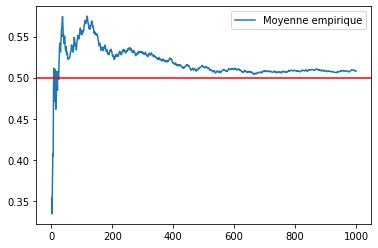

In [209]:
n = 1000
X = np.random.uniform(size=n)

##################################################
# Suite des sommes cumulées pour n de 1 à N 
# divisée par le vecteur d'entiers correspondant.
##################################################
moyenne_emp = np.cumsum(X) / np.arange(1, n + 1)

plt.plot(np.arange(1, n+1), moyenne_emp , label="Moyenne empirique")
plt.axhline(0.5, color='red')
plt.legend(loc='best')
plt.show()
#plt.plot(np.arange(1, n+1), np.ones(n) * 0.5, label='0.5')

### Exercice 6. Théorème central limite

#### 6.1 Le théorème

On rappelle que si $(X_n)$ est une suite de variables aléatoires
indepéndantes identiquement distribuées et de carré
intégrable, d'espérance et écart-type communs notés
respectivement $m$ et $s$, alors en définissant

$$\bar X_n = \frac 1 n (X_1 + \cdots + X_n)$$

la suite

$$\sqrt{n}(\bar X_n - m) / s$$


converge en loi vers la loi gaussienne standard lorsque $n$ tend vers
l'infini.

1. Lorsque la loi des $X_i$ est la loi uniforme sur $[-\sqrt{3},
  \sqrt{3}]$, que valent $m$ et $s$?
  Visualiser, pour $n \gg 1$, la proximité de la loi de $\sqrt{n}(\bar X_n - m) / s$
  avec la loi gaussienne standard (à l'aide d'un histogramme, en simulant un grand
  nombre de réalisations indépendantes de $\sqrt{n}(\bar X_n - m) /
  s$).
  
  
2. Afin d'illustrer la différence de nature profonde entre la
  convergence presque sûre et la convergence en loi, tracer la
  représentation d'une réalisation de la suite $\sqrt{n}(\bar X_n-m)/s$,
  pour $n$ variant de $1$ à $N$. Cette suite semble-t-elle converger?

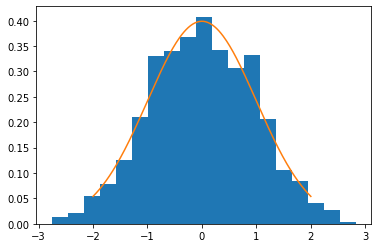

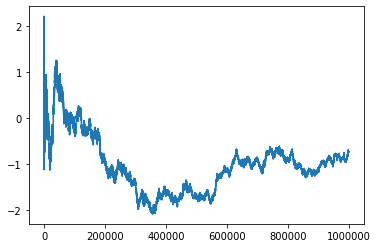

In [218]:
N = int(1.e4)
M = int(1.e3)

###################
# Question 6.1.1
###################
X = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=(M, N))
X = np.mean(X, axis=1)
X = np.sqrt(N) * X / 1

plt.hist(X, bins=int(2 * M**(1 / 3)), density=True, label='hist')
x = np.linspace(-2, 2, 200)
plt.plot(x, stats.norm.pdf(x))
plt.show()

###################
# Question 6.1.2
###################
N = 1000000
X = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=N)
X = np.cumsum(X) / np.sqrt(np.arange(1, N + 1)) / 1
plt.plot(X)
plt.show()

#### 6.2 Intervalles de confiance asymptotiques

Le théorème central limite explique que pour $n$ assez grand,
$\bar X_n - \mathbb E[X]$ est approximativement distribuée comme une variable
aléatoire normale standard multipliée par $\frac s {\sqrt{n}}$. Ainsi,
puisque pour $G$ une variable aléatoire normale standard, on a

$$
  \mathbb P (-1.96 \leq G \leq 1.96) \approx 0.95,
$$

on sait que pour $n$ assez grand, on a approximativement

$$
  \mathbb P \Big( \bar X_n - \frac{1.96 \, s}{\sqrt{n}}
  \leq \mathbb E[X] \leq
  \bar X_n + \frac{1.96 \, s}{\sqrt{n}} \Big) \approx 0.95.
$$

On dit alors que l'intervalle

$$
  \Bigl[ \bar X_n - \frac{1.96 \, s}{\sqrt{n}}, \,
  \bar X_n + \frac{1.96 \, s}{\sqrt{n}} \Bigr]
$$

est un intervalle de confiance asymptotique au niveau 95% pour $\mathbb E[X]$: précisément, 
avec une probabilité asymptotiquement égale à 0.95, le paramètre $\mathbb E[X]$ sera bien
entre les bornes (aléatoires) de cet intervalle.

Bien souvent, l'écart-type $s$ n'est pas plus connu que l'espérance $\mathbb E[X]$.
On peut alors le remplacer par un estimateur, comme

$$
  \widehat {s} = \Big( \frac 1 n \sum_{i=1}^n (X_i - \bar X_n)^2
  \Big)^{1/2}. 
$$

On suppose encore que les $X_i$ sont des v.a. i.i.d. de loi uniforme
sur $[0,1]$.

$\blacktriangleright$ Donner un intervalle de confiance pour l'estimation de $\mathbb E[X]$.

$\blacktriangleright$ Afin d'illustrer la notion d'intervalle de confiance à 95%, fixer des valeurs pour $n$ et $ M$, simuler $M$ fois $\bar X_n$, et vérifier que dans 95% des cas,
$\mathbb E[X]$ se situe bien entre $\bar X_n - \frac{1.96 \, \hat s}{\sqrt{n}}$ et
$\bar X_n + \frac{1.96 \, \hat s}{\sqrt{n}}$.

In [346]:
#####################################
# Intervalle de confiance pour E[X]
#####################################
N = 100
X = np.random.rand(N)

# Niveau de l'intervalle de confiance asymptotique
alpha = 0.05

# Quantile de la gaussienne standard (approx 1.96 pour alpha = 0.05)
q_alpha = stats.norm.ppf(1 - alpha / 2)


#####################################################
# TO DO: compléter avec le calcul de l'intervalle de 
# confiance pour E[X]
#####################################################
s = np.mean((X - X.mean()) ** 2) ** (1 / 2)
print(X.mean() - q_alpha * s / np.sqrt(N), X.mean() + q_alpha * s / np.sqrt(N))

#####################################
# Vérification
#####################################
M = 5000
X = np.random.rand(M, N)

# TO DO: compléter
s = X.std(axis=1)
X = ((X.mean(axis=1) - q_alpha * s / np.sqrt(N)) < 0.5) * ((X.mean(axis=1) + q_alpha * s / np.sqrt(N)) > 0.5)
print(X.sum() / M)

0.44366092529155904 0.5529955214763902
0.9434


### Exercice 7. Des approximations utiles pour le calcul de probabilités d’événements rares : approximation gaussienne vs poissonienne

Soient $X_1, X_2, \cdots$ des v.a. i.i.d. de loi de Bernoulli de paramètre $p$ et $S_n=X_1+\cdots+X_n$. Par ce qui précède, pour de grandes valeurs de $n$, la loi de $S_n$ peut être approchée par une loi de Poisson ou par une loi gaussienne, selon que $p$ soit faible ou pas.

Illustrer ces deux paradigmes en affichant, sur une même figure, les histogrammes en bâtons de la loi de $S_n$ et de
la loi de Poisson correspondante, ainsi que la densité de la loi gaussienne correspondante.

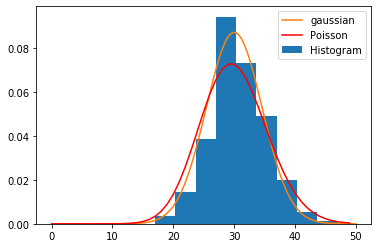

In [359]:
n = 100

p = 0.3    # regime gaussien
pg = 0.01  # regime poisson 

mean_binomial = n * p
sd_binomial = np.sqrt(n * p * (1. - p))

## TO DO: compléter
M = 1000
X = np.random.binomial(n, p, size=M)
plt.hist(X, bins=int(M ** (1 / 3)), density=True, label='Histogram')
x = np.linspace(1, 50, 1000)
plt.plot(x, stats.norm.pdf(x, loc= mean_binomial, scale=sd_binomial), label='gaussian')
x = np.arange(0, 50)
plt.plot(x, stats.poisson.pmf(x, mu = mean_binomial), color='red', label='Poisson')
plt.legend(loc="best")
plt.show()

### Exercice 8. Application de la méthode de Monte-Carlo

#### 8.1 Calcul d'intégrales

On veut calculer l'intégrale, par rapport à la mesure de Lebesgue sur $[0,1]^{10}$, de la fonction
$f(x)=\pi^2(x_1+\cdots+x_{10})^2\sqrt{x_1^2+\cdots+x_{10}^2}$. Soit $I$ la valeur de cette intégrale.
    
(a) On remarquera qu'il sera difficile de résoudre ce problème avec des sommes de
    Riemann, comme on le fait pour les intégrales de fonctions (suffisamment régulières) sur $\mathbb R$.
    
(b) Donner, en utilisant les fonctions `numpy.sum(., axis=...)` (somme des lignes ou des colonnes d'un array),
    `numpy.linalg.norm(., axis=...)` (norme euclidienne des
    lignes ou des colonnes) et `numpy.std` (ecart-type), des valeurs approchées de
    l'espérance et la variance de $f(U)$, avec $U$ variable
    aléatoire de loi uniforme sur $[0,1]^{10}$. En déduire un
    intervalle de confiance à 95% pour $I$. Donner une estimation
    du nombre de simulations nécessaires pour que l'intervalle de
    confiance ait une amplitude au plus égale à 2% de $I$.

In [405]:
###############
# TODO
###############
M = 1000
N = 100
X = np.random.rand(N, M, 10)
X = np.mean(np.pi ** 2 * np.sum(X, axis=2) ** 2 * np.sqrt(np.sum(X * X, axis=2)), axis=1)

s = X.std()
print(X.mean() - q_alpha * s / np.sqrt(N), X.mean() + q_alpha * s / np.sqrt(N))

483.1781405501263 485.6269427227436


#### 8.2 Probabilités multivariés

Calculer la probabilité (avec un intervalle de confiance) qu'un vecteur aléatoire gaussien
centré de taille $9$ et de matrice de covariance $\mbox{diag}([1,2,3,4,5,4,3,2,1]) + M$, avec

$$M = \left[\frac 1{10(i+j)} \right]_{1\le i,j\le 9}$$

se trouve dans l'hypercube $[-5,3]^9$. L'amplitude de l'intervalle pourra atteindre 4% de la probabilité estimée. 

On pourra utiliser la fonction `multivariate_normal` de `numpy.random` pour simuler des vecteurs gaussiens.

In [392]:
###############
# TODO
###############
V = np.diag([1., 2., 3., 4., 5., 4., 3., 2., 1.])
M = np.array([[1 / 10 / (i + j) for i in range(1, 10)] for j in range(1, 10)])
V += M

N = 1000
X = np.random.multivariate_normal(mean=np.zeros(9), cov=V, size=N)
X = (X > -5) * (X < 3)
(X.sum(axis=1) == 9).sum() / N


0.701

#### 8.3  Records pour les composantes d'un vecteur aléatoire

Soit $d$ un entier positif (on fixera par exemple $d=10$). Pour $x=(x_1,\cdots,x_d)$ un vecteur réel, on appelle $record$ de $x$ tout indice $i$ dans ${1,\cdots,d}$ tel que
$x_i=\max(x_1,\cdots,x_i)$. On considère ici le cas où $x$ est
un vecteur aléatoire à coordonnées indépendantes uniformes sur $[0,1]$.

(a) Donner, en appliquant une méthode Monte-Carlo, le
    nombre moyen d'indices $i$ dans $\{2,\cdots,d\}$ tels que $i$ et
    $i-1$ sont tous les deux des records. 
    L'amplitude de l'intervalle de confiance pourra atteindre 4% du nombre estimé.
    On pourra par exemple utiliser la fonction `numpy.maximum.accumulate(., axis=...)` qui
    permet de calculer le maximum cumulé des lignes ou colonnes d'un tableau.
    
(b) Donner la loi du nombre d'indices $i$ dans $\{2,\cdots,d\}$
    tels que $i$ et $i-1$ sont tous les deux des records (en affichant
    l'histogramme).

(c) Faire la même chose avec un vecteur aléatoire $x$
    dont les coordonnées ne sont pas des v.a. i.i.d. (par exemple un
    vecteur gaussien d'espérance et de matrice de covariance non
    standards).

0.911


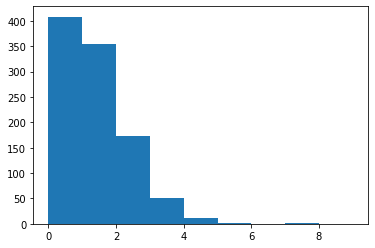

In [434]:
###############
# TODO (a) et (b)
###############
N = 1000
d = 10
X = np.random.rand(N, d)
Y = (np.maximum.accumulate(X, axis=1))
X = X == Y
X = (X[:, 1:] * X[:, :-1]).sum(axis=1)
#(a)
print(X.mean())
#(b)
plt.hist(X, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.show()

In [ ]:
##################
# TODO (c)
##################

### Exercice 9. Simulation de variables aléatoires continues (III): la méthode de rejet

La loi de Wigner est la loi de support $[-2, 2]$ et de densité
$\frac 1{2\pi} \sqrt{4 - x^2}$. 
Simuler un grand nombre de variables aléatoires de loi de Wigner, représenter l'histogramme associé
et le comparer à la densité.

$Rappel$: Pour simuler une v.a. de densité $f$ de support $[a,b]$
et telle que $0\leq f\leq M$, on peut utiliser une suite $(U_n, V_n)_{n\geq 1}$
de couples indépendants de variables aléatoires telles que
pour tout $n$, $U_n, V_n$ sont indépendantes et de lois uniformes
sur respectivement $[a,b]$ et $[0,M]$.
On pose

$$\tau= \min\{n\geq 1 : \, V_n\leq f(U_n)\},$$

la variable aléatoire $U_{\tau}$ suit alors la loi de densité $f$. 

C'est la méthode de simulation par rejet. Notons que plus $M$ est petit, plus cette
méthode est rapide: on a donc intér\^et à choisir $M=\|f\|_\infty$.

In [ ]:
###############
# TODO
###############